In [4]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

plt.style.use(r'U:\DNA-PAINT-SPT\nature_7pt.mplstyle')

# Load data
df_tracks = pd.read_hdf(r'U:\DNA-PAINT-SPT\Fig1F\df_tracks.hdf', key='df_tracks')
df_dimers = pd.read_hdf(r'U:\DNA-PAINT-SPT\Fig1F\df_dimers.hdf', key='df_dimers')

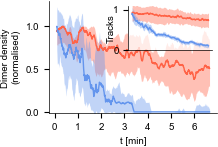

In [5]:
# Plot
f, ax = plt.subplots(1, 1)
f.subplots_adjust(left=0.25, right=0.95, bottom=0.25,
                  top=0.95, wspace=0.5, hspace=0.2)
f.set_figheight(1.6)
f.set_figwidth(2.4)

# Main plot
rolling = 150  # rolling average of 150 frames
df_dimer_expl = df_dimers.explode(['nTracks', 'frame'])

for run in df_dimers.run.unique():
    df_dimerC_expl = df_dimers.loc[df_dimers.run == run].explode(['nTracks', 'frame'])
    normalizer = np.max(df_dimerC_expl.nTracks.rolling(rolling).mean())
    df_dimer_expl.loc[df_dimer_expl.run == run,
                      'nTracks'] = df_dimer_expl.loc[df_dimer_expl.run == run, 'nTracks']/normalizer

colors = iter(['tomato', 'cornflowerblue'])
for condition in df_dimers.condition.unique():
    color = next(colors)
    dfC = df_dimer_expl.loc[df_dimer_expl.condition == condition]
    dfC_grouped = dfC.groupby('frame')['nTracks'].median()
    dfC_grouped = dfC_grouped/np.max(dfC_grouped.rolling(rolling).mean())
    dfC.nTracks = dfC.nTracks/np.max(dfC_grouped.rolling(rolling).mean())
    ax.plot(dfC_grouped.index[rolling:], dfC_grouped.rolling(
        rolling).mean()[rolling:], color=color)
    ax.fill_between(dfC_grouped.index, dfC.groupby('frame')['nTracks'].mean().rolling(rolling).mean()+dfC.groupby('frame')['nTracks'].std().rolling(rolling).mean(),
                    dfC.groupby('frame')['nTracks'].mean().rolling(rolling).mean()-dfC.groupby('frame')['nTracks'].std().rolling(rolling).mean(), color=color, alpha=0.4, lw=0)

ax.set_ylim([-0.01, 1.3])
ax.set_ylabel('Dimer density \n(normalised)')
ax.set_xlabel('t [min]')
ax.set_xticks(np.arange(0, 10000, step=1500))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1500:.0f}'))


# Inset
colors = iter(['tomato', 'cornflowerblue'])
axins = inset_axes(ax, width="50%", height="40%", loc=1)

df_tracks_expl = df_tracks.explode(['nTracks', 'frame'])

for run in df_tracks.run.unique():
    df_tracksC_expl = df_tracks.loc[df_tracks.run == run].explode(['nTracks', 'frame'])
    normalizer = np.max(df_tracksC_expl.nTracks.rolling(rolling).mean())
    df_tracks_expl.loc[df_tracks_expl.run == run,
                       'nTracks'] = df_tracks_expl.loc[df_tracks_expl.run == run, 'nTracks']/normalizer
    df_tracks_expl.nTracks = df_tracks_expl.nTracks.astype('float')

for condition in df_tracks.condition.unique():
    qA = 0.75
    qB = 0.25
    color = next(colors)
    df_C = df_tracks_expl.loc[(df_tracks_expl.condition == condition)]
    df_C_grouped = df_C.groupby(by='frame')['nTracks'].median()
    df_C_grouped75 = df_C.groupby(
        by='frame')['nTracks'].quantile(qA)/np.max(df_C_grouped)
    df_C_grouped25 = df_C.groupby(
        by='frame')['nTracks'].quantile(qB)/np.max(df_C_grouped)

    df_C_grouped = df_C_grouped/np.max(df_C_grouped)

    axins.plot(df_C_grouped.index, df_C_grouped.rolling(rolling).mean(), '-', color=color,
               label=f'{condition}')
    axins.fill_between(df_C_grouped.index, df_C_grouped75.rolling(rolling).mean(), df_C_grouped25.rolling(rolling).mean(), color=color,
                       alpha=0.4, lw=0)

axins.set_ylabel('Tracks', labelpad=-2)
axins.set_xlabel('')
axins.get_xaxis().set_visible(False)
axins.set_ylim([0, 1.1])
axins.patch.set_alpha(0.7)